In [182]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [183]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1,random_state=740)
data = data[:20000]
data.head(10)

# Data Visualization

In [185]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [186]:
data.head(10)

,polarity,id,date,query,user,text
1204515,4,1986309294,Sun May 31 18:39:03 PDT 2009,NO_QUERY,TRIbalChic,Had a nice run today at Lake Hodges. The weath...
1243481,4,1994589530,Mon Jun 01 12:09:14 PDT 2009,NO_QUERY,alliekae,You'll realize it sooner or laterrr
1332314,4,2016159166,Wed Jun 03 06:16:43 PDT 2009,NO_QUERY,Nimilia1621,Goodbye by Miley Cyrus. It's a nice song.
1474423,4,2065731749,Sun Jun 07 09:10:52 PDT 2009,NO_QUERY,crrrazybananuh,"Photo: I wanna go to Japan! Food, fashion and ..."
282046,0,1992501647,Mon Jun 01 08:51:23 PDT 2009,NO_QUERY,linzylou,is struggling with uni work
370682,0,2050203690,Fri Jun 05 18:15:08 PDT 2009,NO_QUERY,Julie1205,wtf i missed the damn song
608078,0,2223191821,Thu Jun 18 07:58:09 PDT 2009,NO_QUERY,iCarluccio,@NaiiLand I know Silly apple!! Why not switch...
629384,0,2231626035,Thu Jun 18 18:48:37 PDT 2009,NO_QUERY,GrantGXL,Love in the club.... nope - people fighting
1351839,4,2046174910,Fri Jun 05 11:48:04 PDT 2009,NO_QUERY,kaleenasdiary,Bout to start this party thing... kids las day...
311579,0,2001331555,Tue Jun 02 00:32:26 PDT 2009,NO_QUERY,doc18,so want the Toasted Marshalls!!! http://tiny...


In [187]:
data['polarity'].unique()

array([4, 0])

In [188]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1204515,1,1986309294,Sun May 31 18:39:03 PDT 2009,NO_QUERY,TRIbalChic,Had a nice run today at Lake Hodges. The weath...
1243481,1,1994589530,Mon Jun 01 12:09:14 PDT 2009,NO_QUERY,alliekae,You'll realize it sooner or laterrr
1332314,1,2016159166,Wed Jun 03 06:16:43 PDT 2009,NO_QUERY,Nimilia1621,Goodbye by Miley Cyrus. It's a nice song.
1474423,1,2065731749,Sun Jun 07 09:10:52 PDT 2009,NO_QUERY,crrrazybananuh,"Photo: I wanna go to Japan! Food, fashion and ..."
282046,0,1992501647,Mon Jun 01 08:51:23 PDT 2009,NO_QUERY,linzylou,is struggling with uni work


In [189]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.496950,1.996930e+09
std,0.500003,1.952077e+08
min,0.000000,1.467823e+09
25%,0.000000,1.956010e+09
50%,0.000000,2.001651e+09
75%,1.000000,2.176747e+09
max,1.000000,2.329178e+09


In [190]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  9939
No. of negative tagged sentences is: 10061


In [191]:
# get a word count per of text
def word_count(words):
    return len(words.split())

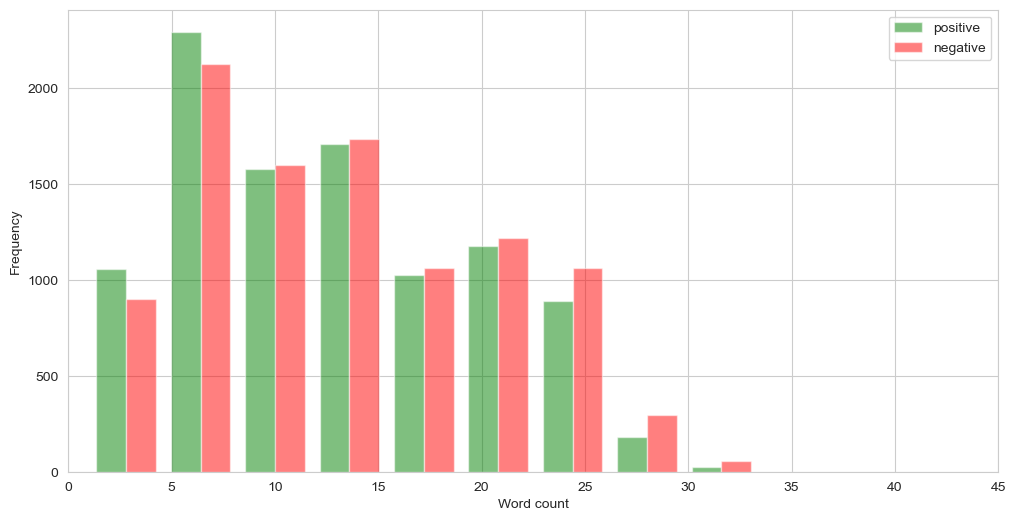

In [192]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [193]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6343),
 ('and', 3732),
 ('you', 2964),
 ('for', 2633),
 ('have', 1793),
 ("i'm", 1678),
 ('that', 1610),
 ('but', 1551),
 ('just', 1503),
 ('with', 1417),
 ('was', 1274),
 ('not', 1273),
 ('this', 1123),
 ('get', 1016),
 ('all', 973),
 ('like', 956),
 ('good', 953),
 ('are', 937),
 ('out', 864),
 ("it's", 825)]

<Axes: xlabel='polarity', ylabel='count'>

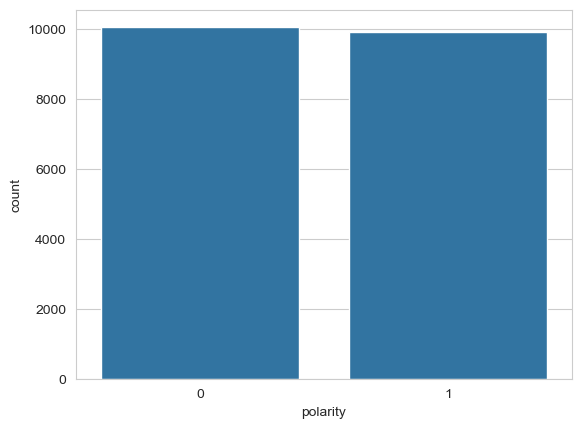

In [194]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [195]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [196]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
1204515,1,Had a nice run today at Lake Hodges. The weath...
1243481,1,You'll realize it sooner or laterrr
1332314,1,Goodbye by Miley Cyrus. It's a nice song.
1474423,1,"Photo: I wanna go to Japan! Food, fashion and ..."
282046,0,is struggling with uni work
370682,0,wtf i missed the damn song
608078,0,@NaiiLand I know Silly apple!! Why not switch...
629384,0,Love in the club.... nope - people fighting
1351839,1,Bout to start this party thing... kids las day...
311579,0,so want the Toasted Marshalls!!! http://tiny...


In [197]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [198]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [199]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'with', 'had', 'should', 'that', 'himself', 'll', "it's", 'but', 'same', 'of', 'both', 'ma', "we'll", 'out', 'hasn', 'd', 'for', 'if', 'into', 'their', 'are', "she's", 'him', "we'd", 'once', "wouldn't", 'having', "i'm", 'or', 'there', 'few', "aren't", "shan't", 's', 'aren', 'each', 'so', 'other', 'some', 'through', 'his', "he'll", 'such', 'yourself', "you've", 'these', 'can', "should've", 'your', 'most', 'too', 'them', 'as', "he's", 'after', 'by', 'under', 'i', 'off', 'we', 'ourselves', "weren't", 'again', "they've", 'wouldn', 'why', 'all', "i'll", "you'd", "wasn't", 'itself', 'during', 'theirs', "didn't", 'yours', 'between', "doesn't", "i'd", "i've", 'our', 'just', 'weren', 'couldn', 'her', 'needn', 'and', "haven't", 'hadn', "don't", 'over', 'be', 'isn', "couldn't", 'what', "mustn't", 'is', 'below', 'any', 'have', 'does', "she'd", 'about', "she'll", "hasn't", "that'll", 'ain', 'then', 'how', 'own', 'didn', 'in', 'haven', 'themselves', 'nor', 'she', "they're", "you'll", 'me', 'will', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [200]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [201]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets_negation_handling_fix(tweet):
    # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    # 移除非字母数字、空格和'的字符
    tweet = re.sub(r"[^\w\s']", '', tweet)
    # --- 特殊否定缩写处理 ---
    # 1. 明确处理 can't → cannot
    tweet = re.sub(r"\bcan't\b", "cannot", tweet)
    # 2. 处理 won't → will not
    tweet = re.sub(r"\bwon't\b", "will not", tweet)
    # 3. 处理 shan't → shall not
    tweet = re.sub(r"\bshan't\b", "shall not", tweet)
    # 4. 处理 ain't → is not
    tweet = re.sub(r"\bain't\b", "is not", tweet)
    # --- 通用n't处理 ---
    # 将剩余n't替换为 not（如didn't → did not）
    tweet = re.sub(r"n't\b", " not", tweet)
    # --- 处理其他撇号为空格（如I'll → I ll）---
    tweet = re.sub(r"'", ' ', tweet)

    #tokenizing words
    tokens = word_tokenize(tweet)
    # Remove punctuations but remain ‘n't’
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]

    for w in tokens:
        if len(w) > 1:
            # 动词词性还原（解决 does→doe 问题）
            word = wordLemm.lemmatize(w, pos='v')
            # 名词词性还原（根据任务需求）
            word = wordLemm.lemmatize(word, pos='n')
            finalwords.append(word)
    return ' '.join(finalwords)

In [202]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets_negation_handling_fix(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [203]:
data.head(10)

,polarity,text,processed_tweets
1204515,1,Had a nice run today at Lake Hodges. The weath...,have nice run today at lake hodges the weather...
1243481,1,You'll realize it sooner or laterrr,you ll realize it sooner or laterrr
1332314,1,Goodbye by Miley Cyrus. It's a nice song.,goodbye by miley cyrus it nice song
1474423,1,"Photo: I wanna go to Japan! Food, fashion and ...",photo wan na go to japan food fashion and scen...
282046,0,is struggling with uni work,be struggle with uni work
370682,0,wtf i missed the damn song,wtf miss the damn song
608078,0,@NaiiLand I know Silly apple!! Why not switch...,know silly apple why not switch to att you get...
629384,0,Love in the club.... nope - people fighting,love in the club nope people fight
1351839,1,Bout to start this party thing... kids las day...,bout to start this party thing kid la day of s...
311579,0,so want the Toasted Marshalls!!! http://tiny...,so want the toast marshall


# RNN - LSTM

In [204]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization, LeakyReLU

## Hyperparameters

In [205]:
num_epochs = 10
max_len = 200
hidden_units = 4
LSTM_units = 32
learning_rate = 0.001
dropout = 0.0

results = {}
params_history = {}
max_words = [1000, 2000, 5000, 8000, 10000]  # 词汇量max_words
embedding_dims = [16, 32, 64, 128]  # Embedding 维度embedding_dim

## Creating and Traning LSTM Model

In [206]:
def create_lstm_model(max_word, embedding_dim):
    model = Sequential()
    model.add(layers.Embedding(max_word, embedding_dim))
    model.add(layers.LSTM(LSTM_units, dropout=dropout))
    model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [207]:
models = {}
for max_word in max_words:
    for embedding_dim in embedding_dims:
        print(f"Training model with max_word={max_word}, embedding_dim={embedding_dim}...")

        # 重新创建 Tokenizer，确保只保留 max_word 个最常见单词
        tokenizer = Tokenizer(num_words=max_word)
        tokenizer.fit_on_texts(data.processed_tweets)
        sequences = tokenizer.texts_to_sequences(data.processed_tweets)
        tweets = pad_sequences(sequences, maxlen=max_len)

        # 划分数据集
        train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

        model = create_lstm_model(max_word, embedding_dim)

        history = model.fit(
            train_data, train_label,
            epochs=num_epochs,
            validation_data=(test_data, test_label),
            verbose=2
        )

        results[(max_word, embedding_dim)] = {
            'train_acc': history.history['accuracy'][-1],
            'test_acc': history.history['val_accuracy'][-1]
        }

        params_history[(max_word, embedding_dim)] = model.count_params()
        models[(max_word, embedding_dim)] = model

Training model with input_dim=1000, output_dim=16...
Epoch 1/10
500/500 - 16s - 32ms/step - accuracy: 0.6615 - loss: 0.6055 - val_accuracy: 0.7450 - val_loss: 0.5263
Epoch 2/10
500/500 - 15s - 29ms/step - accuracy: 0.7557 - loss: 0.5076 - val_accuracy: 0.7535 - val_loss: 0.5121
Epoch 3/10
500/500 - 14s - 27ms/step - accuracy: 0.7698 - loss: 0.4894 - val_accuracy: 0.7567 - val_loss: 0.5078
Epoch 4/10
500/500 - 14s - 27ms/step - accuracy: 0.7742 - loss: 0.4811 - val_accuracy: 0.7527 - val_loss: 0.5090
Epoch 5/10
500/500 - 14s - 27ms/step - accuracy: 0.7763 - loss: 0.4772 - val_accuracy: 0.7573 - val_loss: 0.5069
Epoch 6/10
500/500 - 14s - 27ms/step - accuracy: 0.7779 - loss: 0.4726 - val_accuracy: 0.7595 - val_loss: 0.5077
Epoch 7/10
500/500 - 14s - 27ms/step - accuracy: 0.7803 - loss: 0.4702 - val_accuracy: 0.7580 - val_loss: 0.5091
Epoch 8/10
500/500 - 14s - 27ms/step - accuracy: 0.7841 - loss: 0.4655 - val_accuracy: 0.7592 - val_loss: 0.5060
Epoch 9/10
500/500 - 14s - 27ms/step - accu

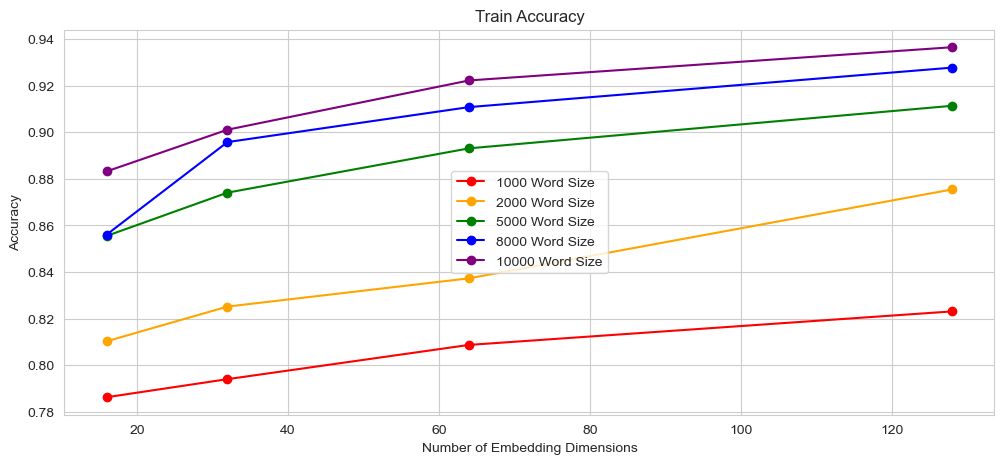

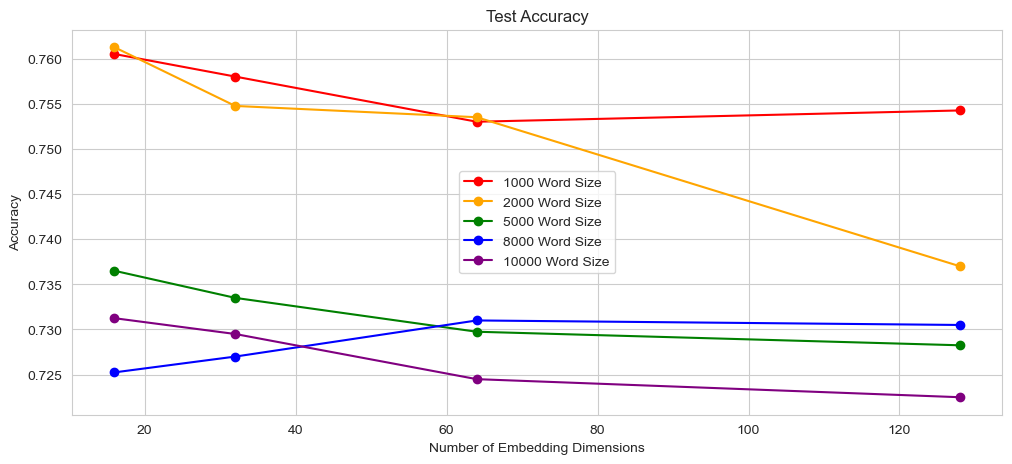

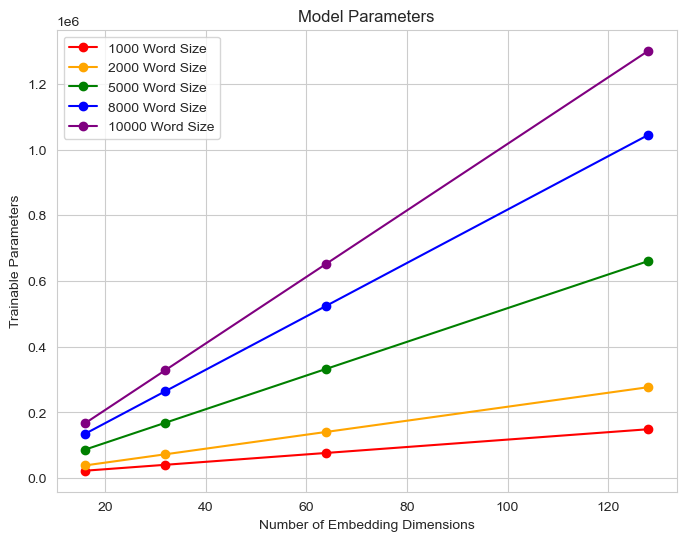

In [208]:
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
# --- 训练精度折线图 ---
plt.figure(figsize=(12, 5))
for i, max_word in enumerate(max_words):
    train_acc = [results[(max_word, embedding_dim)]['train_acc'] for embedding_dim in embedding_dims]
    plt.plot(embedding_dims, train_acc, marker='o', linestyle='-', color=colors[i], label=f"{max_word} Word Size")
plt.xlabel("Number of Embedding Dimensions")
plt.ylabel("Accuracy")
plt.title("Train Accuracy")
plt.legend()
plt.show()

# --- 测试精度折线图 ---
plt.figure(figsize=(12, 5))
for i, max_word in enumerate(max_words):
    test_acc = [results[(max_word, embedding_dim)]['test_acc'] for embedding_dim in embedding_dims]
    plt.plot(embedding_dims, test_acc, marker='o', linestyle='-', color=colors[i], label=f"{max_word} Word Size")
plt.xlabel("Number of Embedding Dimensions")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.show()

# --- 参数量变化折线图 ---
plt.figure(figsize=(8, 6))
for i, max_word in enumerate(max_words):
    params = [params_history[(max_word, embedding_dim)] for embedding_dim in embedding_dims]
    plt.plot(embedding_dims, params, marker='o', linestyle='-', color=colors[i], label=f"{max_word} Word Size")
plt.xlabel("Number of Embedding Dimensions")
plt.ylabel("Trainable Parameters")
plt.title("Model Parameters")
plt.legend()
plt.show()

